<a href="https://colab.research.google.com/github/slybasilisk/image-classifier-slb/blob/main/image_classifier_slb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib


170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

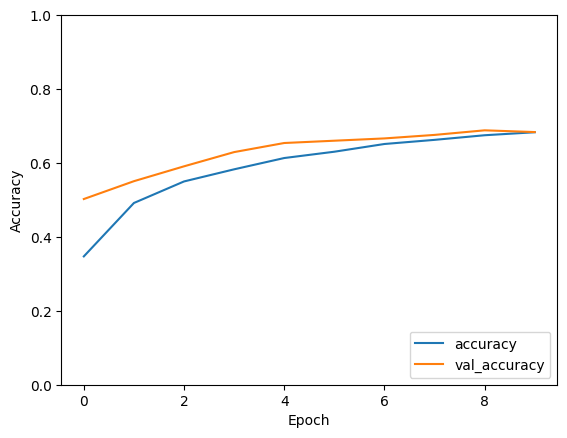

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from PIL import Image
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Function to predict image class
def predict_image_class(image_path):
    # Load and preprocess the image
    uploaded_image = Image.open(image_path).resize((32, 32))
    uploaded_image = np.array(uploaded_image) / 255.0
    uploaded_image = np.expand_dims(uploaded_image, axis=0)

    # Make prediction
    predictions = model.predict(uploaded_image)
    predicted_label = np.argmax(predictions)

    # Map predicted label to class name
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_class_name = class_names[predicted_label]

    return predicted_class_name

# Continuous loop for image classification
while True:
    # Prompt user to enter image path
    image_path = input("Enter the path to the image you want to classify (or type 'exit' to quit): ")

    # Check if the user wants to exit
    if image_path.lower() == 'exit':
        print("Exiting...")
        break

    try:
        # Predict image class
        predicted_class = predict_image_class(image_path)
        print("Predicted class:", predicted_class)
    except Exception as e:
        print("Error:", e)


Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5371 - accuracy: 0.4382 - val_loss: 1.3220 - val_accuracy: 0.5181
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1759 - accuracy: 0.5804 - val_loss: 1.0817 - val_accuracy: 0.6164
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0271 - accuracy: 0.6388 - val_loss: 0.9901 - val_accuracy: 0.6471
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9276 - accuracy: 0.6760 - val_loss: 0.9193 - val_accuracy: 0.6801
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8566 - accuracy: 0.6984 - val_loss: 0.9128 - val_accuracy: 0.6796
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7999 - accuracy: 0.7224 - val_loss: 0.9072 - val_accuracy: 0.6874
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7561 - accuracy: 0.7356 - val_loss: 0.8779 -